# Dataset 1

In [1]:
DATA = load("-ascii", "data/A6-RoverData-1.txt");
[n, _] = size(DATA)

x = zeros(2, 1);
P = 100 * eye(2);
Nv = zeros(2000, 1);

function [x_new P_new nv S] = update(x, P, z, R)
  S = P + R;
  W = P * inv(S);
  nv = z - x;
  x_new = x + W * nv;
  P_new = P - W * S * W';
endfunction

i_observation = 1
for idx=1:n
    v = DATA(idx, 2:3)';
    M = [DATA(idx, 4) DATA(idx, 5); DATA(idx, 5) DATA(idx, 6)];
    if (DATA(idx, 1) == 0) # control
       x += v;
       P += M*M;
    else # observation
       z = v;
       R = M*M;
       [x P nv S] = update(x, P, z, R);
       Nv(i_observation) = nv(1) / sqrt(S(1, 1));
       i_observation+=1;
    endif
endfor

n =  18060
_ =  6
i_observation =  1



## 1. Normalized innovations

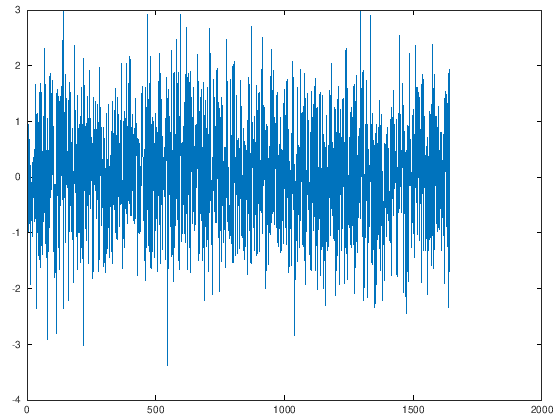

In [2]:
plot(2:i_observation-1, Nv(2:i_observation-1))

Comparison to randn()

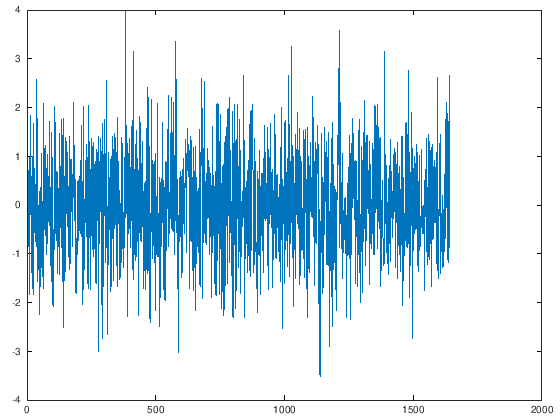

In [3]:
plot(2:i_observation-1, randn(i_observation-1-1, 1))

## 2. Mean and variance of the innovation

In [4]:
mean(Nv(1:i_observation-1))
cov(Nv(1:i_observation-1))

ans =  0.019909
ans =  1.0139


## 3. Final estimated mean and sqrtm(covariance)

In [5]:
x

x =

   10495.99276
   12627.99208



In [6]:
sqrtm(P)

ans =

   0.558410   0.087197
   0.087197   0.606558



# Dataset 2

In [7]:
DATA = load("-ascii", "data/A6-RoverData-2.txt");
[n, _] = size(DATA)

x = zeros(2, 1);
P = 100 * eye(2);
Nv = zeros(n, 1);

function [x_new P_new nv S] = update(x, P, z, R)
  S = P + R;
  W = P * inv(S);
  nv = z - x;
  x_new = x + W * nv;
  P_new = P - W * S * W';
endfunction

i_observation=1;
for idx=1:n
    v = DATA(idx, 2:3)';
    M = [DATA(idx, 4) DATA(idx, 5); DATA(idx, 5) DATA(idx, 6)];
    if (DATA(idx, 1) == 0) # control
       x += v;
       P += M*M;
    else # observation
       z = v;
       R = M*M;
       [x P nv S] = update(x, P, z, R);
       Nv(i_observation) = nv(1) / sqrt(S(1, 1));
       i_observation+=1;
    endif
endfor

n =  17520
_ =  6


## 1. Normalized innovations

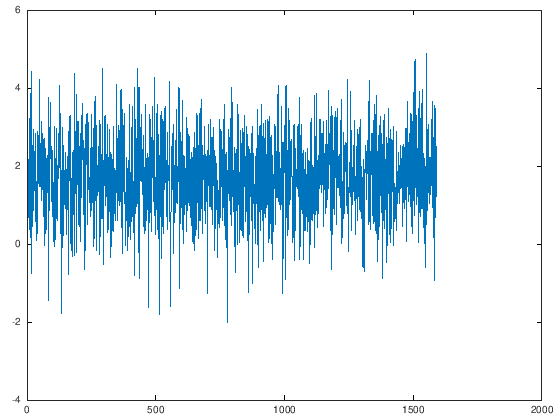

In [8]:
plot(2:i_observation-1, Nv(2:i_observation-1))

Comparison to randn()

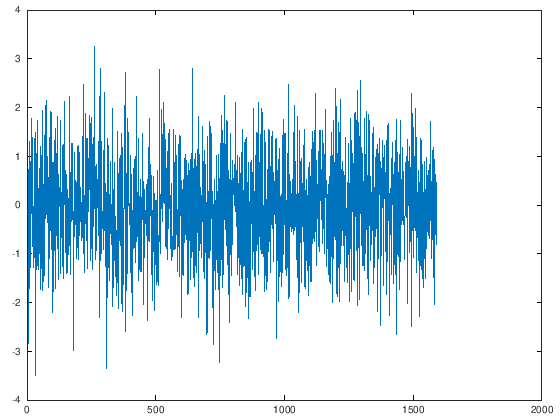

In [9]:
plot(2:i_observation-1, randn(i_observation-1-1, 1))

## 2. Mean and variance of the innovation

In [10]:
mean(Nv(1:i_observation-1))
cov(Nv(1:i_observation-1))

ans =  1.7039
ans =  1.0305


## 3. Final estimated mean and sqrtm(covariance)

In [11]:
x

x =

   10496.28444
   12626.78133



In [12]:
sqrtm(P)

ans =

   0.495486   0.059944
   0.059944   0.683701

